# PROBLEM STATEMENT for ANN:
Dataset Link - advertising.csv    
In this assignment you will be working with a dummy advertising data set, indicating whether or not a particular internet user clicked on an Advertisement on a company website. you will try to create a model that will predict whether or not they will click on an ad based on the features of that user.
This data set contains the following features:
* 'Daily Time Spent on Site': consumer time on site in minutes
* 'Age': customer age in years
* 'Area Income': Avg. Income of geographical area of consumer
* 'Daily Internet Usage': Avg. minutes a day consumer is on the internet
* 'Ad Topic Line': Headline of the advertisement
* 'City': City of consumer
* 'Male': Whether or not consumer was male
* 'Country': Country of consumer
* 'Timestamp': Time at which consumer clicked on Ad or closed window
* 'Clicked on Ad': 0 or 1 indicated clicking on Ad
For the dataset (Advertising dataset), implement the ANN classifier using Keras in Python. [5M]
Dataset: Advertising Dataset.csv
The marks distribution are as follows:
1.	Import the libraries and Load the dataset and Remove/replace missing values (if any) [1M]
2.	Split features and labels [0.5M]
3.	Split train and test data [0.5M]
4.	Implement ANN Classifier using Keras [2M]
5.	Calculate accuracy measures [1M]

Justify model.

For any Queries on this question, Contact: sanjjayyp@wilp.bits-pilani.ac.in


### Q1: Import the libraries and Load the dataset and Remove/replace missing values (if any) 
Importing required libraries

In [1]:
#Dependencies
import tensorflow as tf
import numpy as np
import pandas as pd
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.layers.experimental.preprocessing import Normalization
import os

In [2]:
#dataset import
#to set up the current directory for input car dataset
#place advertising.csv file under the same dir where this .ipynb file is placed.
__location__ = os.path.realpath(os.getcwd())
for dirname, _, filenames in os.walk(__location__):
    for filename in filenames:
        if filename == 'advertising-1.csv':
            input_data = os.path.join(dirname, filename)
print(input_data)
dataset = pd.read_csv(input_data)

/Users/lohiya/AnacondaProjects/BITS_ML_ASSIGNMENT_2/advertising-1.csv


### Outlier and Null data detection

In [3]:
# dataset info
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Daily Time Spent on Site  1000 non-null   float64
 1   Age                       1000 non-null   int64  
 2   Area Income               1000 non-null   float64
 3   Daily Internet Usage      1000 non-null   float64
 4   Ad Topic Line             1000 non-null   object 
 5   City                      1000 non-null   object 
 6   Male                      1000 non-null   int64  
 7   Country                   1000 non-null   object 
 8   Timestamp                 1000 non-null   object 
 9   Clicked on Ad             1000 non-null   int64  
dtypes: float64(3), int64(3), object(4)
memory usage: 78.2+ KB


In [4]:
# dataset shape
dataset.shape

(1000, 10)

In [5]:
# Dataset 
dataset.head()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Male,Country,Timestamp,Clicked on Ad
0,68.95,35,61833.90,256.09,Cloned 5thgeneration orchestration,Wrightburgh,0,Tunisia,2016-03-27 00:53:11,0
1,80.23,31,68441.85,193.77,Monitored national standardization,West Jodi,1,Nauru,2016-04-04 01:39:02,0
2,69.47,26,59785.94,236.50,Organic bottom-line service-desk,Davidton,0,San Marino,2016-03-13 20:35:42,0
3,74.15,29,54806.18,245.89,Triple-buffered reciprocal time-frame,West Terrifurt,1,Italy,2016-01-10 02:31:19,0
4,68.37,35,73889.99,225.58,Robust logistical utilization,South Manuel,0,Iceland,2016-06-03 03:36:18,0


In [6]:
# Dataset describe
dataset.describe()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Male,Clicked on Ad
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000
mean,65.000200,36.009000,55000.000080,180.000100,0.481000,0.50000
std,15.853615,8.785562,13414.634022,43.902339,0.499889,0.50025
min,32.600000,19.000000,13996.500000,104.780000,0.000000,0.00000
25%,51.360000,29.000000,47031.802500,138.830000,0.000000,0.00000
50%,68.215000,35.000000,57012.300000,183.130000,0.000000,0.50000
75%,78.547500,42.000000,65470.635000,218.792500,1.000000,1.00000
max,91.430000,61.000000,79484.800000,269.960000,1.000000,1.00000


In [7]:
#Null value check
dataset.isnull().sum()

Daily Time Spent on Site    0
Age                         0
Area Income                 0
Daily Internet Usage        0
Ad Topic Line               0
City                        0
Male                        0
Country                     0
Timestamp                   0
Clicked on Ad               0
dtype: int64


Above output shows no null data and oulier in dataset

### Hot Encoding procedure 


In [8]:
##ULS 
#  1 hot encoding, 'Ad Topic Line'
len(dataset['Ad Topic Line'].value_counts())

1000

In [9]:
#Drop 'Ad Topic Line', all 1000 values are unqiue
dataset=dataset.drop( columns='Ad Topic Line')
dataset.head()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,City,Male,Country,Timestamp,Clicked on Ad
0,68.95,35,61833.90,256.09,Wrightburgh,0,Tunisia,2016-03-27 00:53:11,0
1,80.23,31,68441.85,193.77,West Jodi,1,Nauru,2016-04-04 01:39:02,0
2,69.47,26,59785.94,236.50,Davidton,0,San Marino,2016-03-13 20:35:42,0
3,74.15,29,54806.18,245.89,West Terrifurt,1,Italy,2016-01-10 02:31:19,0
4,68.37,35,73889.99,225.58,South Manuel,0,Iceland,2016-06-03 03:36:18,0


In [10]:
##ULS 
#  1 hot encoding, 'City'
len(dataset['City'].value_counts())

969

In [11]:
#Drop 'City', all 1000 values has 969  unqiue Cities
dataset=dataset.drop( columns='City')
dataset.head()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Male,Country,Timestamp,Clicked on Ad
0,68.95,35,61833.90,256.09,0,Tunisia,2016-03-27 00:53:11,0
1,80.23,31,68441.85,193.77,1,Nauru,2016-04-04 01:39:02,0
2,69.47,26,59785.94,236.50,0,San Marino,2016-03-13 20:35:42,0
3,74.15,29,54806.18,245.89,1,Italy,2016-01-10 02:31:19,0
4,68.37,35,73889.99,225.58,0,Iceland,2016-06-03 03:36:18,0


In [12]:
##ULS 
#  1 hot encoding, 'Country'
len(dataset['Country'].value_counts())

237

In [13]:
#Drop 'Country', all 1000 values has 237 unqiue (Almost on an average of 4 enties for same country)
dataset=dataset.drop( columns='Country')
dataset.head()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Male,Timestamp,Clicked on Ad
0,68.95,35,61833.90,256.09,0,2016-03-27 00:53:11,0
1,80.23,31,68441.85,193.77,1,2016-04-04 01:39:02,0
2,69.47,26,59785.94,236.50,0,2016-03-13 20:35:42,0
3,74.15,29,54806.18,245.89,1,2016-01-10 02:31:19,0
4,68.37,35,73889.99,225.58,0,2016-06-03 03:36:18,0


In [14]:
##ULS 
#1 hot encoding, 'Timestamp'
len(dataset['Timestamp'].value_counts())

1000

In [15]:
#Drop 'Timestamp', all 1000 values are unqiue
dataset=dataset.drop( columns='Timestamp')
dataset.head()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Male,Clicked on Ad
0,68.95,35,61833.90,256.09,0,0
1,80.23,31,68441.85,193.77,1,0
2,69.47,26,59785.94,236.50,0,0
3,74.15,29,54806.18,245.89,1,0
4,68.37,35,73889.99,225.58,0,0


We tried to "1 Hot Encoding" 3 attribute which were not numeric asumming categorical <br>
 1) 'Ad Topic Line':1000 rows has 1000 unique values, not possible to "1 hot encoding" so droping the  'Ad Topic Line' attribure<br>
 2) 'City': 1000 rows has 969 unique values, not possible to "1 hot encoding" so droping the 'City' attribute<br>
 3) 'Country': 1000 rows has 237 unique values, not possible to "1 hot encoding" so droping the 'Country' attribute<br>

### Q2: Split features and labels

In [16]:
# Generating tf.data.Dataset objects for each dataframe by spiltting the features and labels
def dataframe_to_dataset(dataframe):
    dataframe = dataframe.copy()
    labels = dataframe.pop("Clicked on Ad")
    ds = tf.data.Dataset.from_tensor_slices((dict(dataframe), labels))
    ds = ds.shuffle(buffer_size=len(dataframe))
    return ds

### Q3. Split train and test data 

In [17]:
#Split the data into a training and validation set
test_dataframe = dataset.sample(frac=0.2, random_state=75)
train_dataframe = dataset.drop(test_dataframe.index)
val_dataframe = train_dataframe.sample(frac=0.25, random_state=75)
train_dataframe = train_dataframe.drop(val_dataframe.index)

print(
    "Using %d samples for training and %d for validation"
    % (len(train_dataframe), len(val_dataframe))
)

Using 600 samples for training and 200 for validation


In [18]:
train_ds = dataframe_to_dataset(train_dataframe)
val_ds = dataframe_to_dataset(val_dataframe)
test_ds = dataframe_to_dataset(test_dataframe)

Each Dataset yields a tuple (input, target) where input is a dictionary of features and target is the value 0 or 1

In [19]:
for x, y in train_ds.take(1):
    print("Input:", x)
    print("Target:", y)

Input: {'Daily Time Spent on Site': <tf.Tensor: shape=(), dtype=float64, numpy=73.93>, 'Age': <tf.Tensor: shape=(), dtype=int64, numpy=44>, 'Area Income': <tf.Tensor: shape=(), dtype=float64, numpy=74180.05>, 'Daily Internet Usage': <tf.Tensor: shape=(), dtype=float64, numpy=218.22>, 'Male': <tf.Tensor: shape=(), dtype=int64, numpy=0>}
Target: tf.Tensor(0, shape=(), dtype=int64)


In [20]:
list(train_ds.take(1).as_numpy_iterator())

[({'Daily Time Spent on Site': 62.14,
   'Age': 41,
   'Area Income': 59397.89,
   'Daily Internet Usage': 110.93,
   'Male': 1},
  1)]

Let's batch the datasets:

In [21]:
train_ds = train_ds.batch(50)
val_ds = val_ds.batch(50)
test_ds = test_ds.batch(50)

All the selected features are continous numerical, Hence for each of these features, we will use a Normalization() layer to make sure the mean of each feature is 0 and its standard deviation is 1.

In [22]:
#Normalizing the data
def encode_numerical_feature(feature, name, dataset):
    # Create a Normalization layer for our feature
    normalizer = Normalization()

    # Prepare a Dataset that only yields our feature
    feature_ds = dataset.map(lambda x, y: x[name])
    feature_ds = feature_ds.map(lambda x: tf.expand_dims(x, -1))

    # Learn the statistics of the data
    normalizer.adapt(feature_ds)

    # Normalize the input feature
    encoded_feature = normalizer(feature)
    return encoded_feature

### Q4. Implement ANN Classifier using Keras

In [23]:
# Numerical features as Input
age = keras.Input(shape=(1,), name="Age")
time_spent = keras.Input(shape=(1,), name="Daily Time Spent on Site")
income = keras.Input(shape=(1,), name="Area Income")
internet = keras.Input(shape=(1,), name="Daily Internet Usage")
male = keras.Input(shape=(1,), name="Male")

all_inputs = [age, time_spent, income, internet, male]

# Encoding Numerical features
age_encoded = encode_numerical_feature(age, "Age", train_ds)
time_encoded = encode_numerical_feature(time_spent, "Daily Time Spent on Site", train_ds)
income_encoded = encode_numerical_feature(income, "Area Income", train_ds)
internet_encoded = encode_numerical_feature(internet, "Daily Internet Usage", train_ds)
male_encoded = encode_numerical_feature(male, "Male", train_ds)

all_features = layers.concatenate([age_encoded, time_encoded, income_encoded, internet_encoded, male_encoded])

In [24]:
x = layers.Dense(32, activation="relu")(all_features)
x = layers.Dropout(0.5)(x)
output = layers.Dense(1, activation="sigmoid")(x)
model = keras.Model(all_inputs, output)
model.compile("adam", "binary_crossentropy", metrics=["accuracy"])

Let's visualize our connectivity graph:

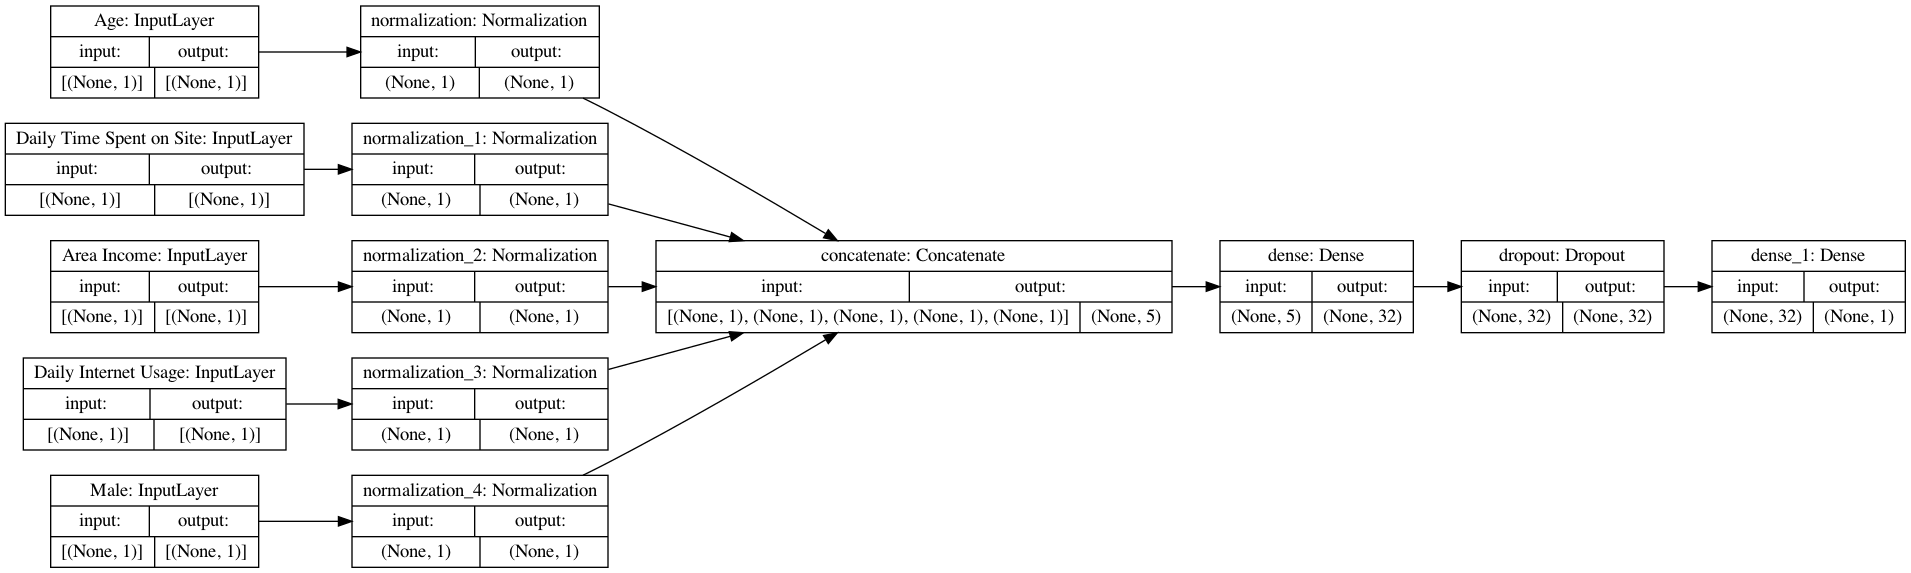

In [25]:
# `rankdir='LR'` is to make the graph horizontal.
keras.utils.plot_model(model, show_shapes=True, rankdir="LR")

In [26]:
# Train the model
history = model.fit(train_ds, epochs=50, validation_data=val_ds)

Epoch 1/50
12/12 [==============================] - 1s 45ms/step - loss: 0.7384 - accuracy: 0.5055 - val_loss: 0.6295 - val_accuracy: 0.6800
Epoch 2/50
12/12 [==============================] - 0s 3ms/step - loss: 0.6594 - accuracy: 0.6026 - val_loss: 0.5699 - val_accuracy: 0.7600
Epoch 3/50
12/12 [==============================] - 0s 4ms/step - loss: 0.6434 - accuracy: 0.6153 - val_loss: 0.5174 - val_accuracy: 0.8600
Epoch 4/50
12/12 [==============================] - 0s 4ms/step - loss: 0.5854 - accuracy: 0.6784 - val_loss: 0.4696 - val_accuracy: 0.9250
Epoch 5/50
12/12 [==============================] - 0s 4ms/step - loss: 0.5127 - accuracy: 0.7849 - val_loss: 0.4283 - val_accuracy: 0.9450
Epoch 6/50
12/12 [==============================] - 0s 4ms/step - loss: 0.4713 - accuracy: 0.8477 - val_loss: 0.3908 - val_accuracy: 0.9550
Epoch 7/50
12/12 [==============================] - 0s 4ms/step - loss: 0.4197 - accuracy: 0.8567 - val_loss: 0.3574 - val_accuracy: 0.9550
Epoch 8/50
12/12 [=

### Q5. Calculate accuracy measures 

In [28]:
print("Evaluate on Test data")
results = model.evaluate(test_ds)
print("Test loss:", results[0])
print("Test acc:", results[1])

Evaluate on test data
4/4 [==============================] - 0s 1ms/step - loss: 0.0777 - accuracy: 0.9750
Test loss: 0.07774844765663147
Test acc: 0.9750000238418579


We see that the Accuracy is approximate 97.5% for the above model and loss is 0.07 for the above model on test data. 

We can also see the curves on Model accuracy vs Epoch & Model loss vs Epoch

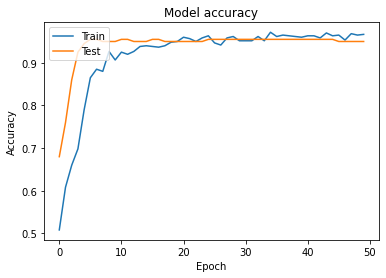

In [29]:
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

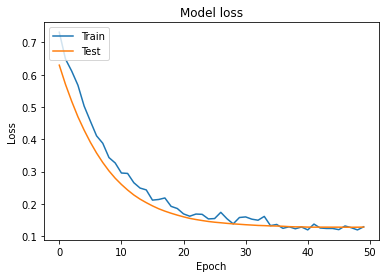

In [30]:
plt.plot(history.history['loss']) 
plt.plot(history.history['val_loss']) 
plt.title('Model loss') 
plt.ylabel('Loss') 
plt.xlabel('Epoch') 
plt.legend(['Train', 'Test'], loc='upper left') 
plt.show()